# 6.4 Supervised Machine Learning: Regression Part 1

## Contents:

### 1. Importing libraries and data
### 2. Data cleaning
### 3. Data prep for regression analysis
### 4. Regression analysis
### Bonus: performance improvement after removing outliers

## 01. Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Ensure that the graphs created are displayed within the notebook without the need to "call" them specifically.
%matplotlib inline

In [3]:
# Create path
path=r'/Users/aylaarreguin/10-04-2022 AllTrails National Park Trail Analysis/'

In [6]:
# Import the cleaned AllTrail dataset 
df = pd.read_csv(os.path.join(path, 'Data/Prepared Data/AllTrails_cleaned.csv'), index_col=[0])

## 02. Data Cleaning 

In [8]:
# Check columns 
df.columns

Index(['trail_id', 'name', 'area_name', 'city_name', 'state_name',
       'country_name', 'popularity', 'difficulty_rating', 'route_type',
       'avg_rating', 'num_reviews', 'features', 'activities', 'length_miles',
       'elevation_gain_feet', 'latitude', 'longitude', 'difficulty',
       'features_count', 'activities_count'],
      dtype='object')

In [11]:
# Check Dataframe 
df.head(20)

,trail_id,name,area_name,city_name,state_name,country_name,popularity,difficulty_rating,route_type,avg_rating,num_reviews,features,activities,length_miles,elevation_gain_feet,latitude,longitude,difficulty,features_count,activities_count
0,10020048,Harding Ice Field Trail,Kenai Fjords National Park,Seward,Alaska,United States,24.8931,5,out and back,5.0,423,"['dogs-no', 'forest', 'river', 'views', 'water...","['birding', 'camping', 'hiking', 'nature-trips...",9.699973,3812.000122,60.18852,-149.63156,hard,7,5
1,10236086,Mount Healy Overlook Trail,Denali National Park,Denali National Park,Alaska,United States,18.0311,3,out and back,4.5,260,"['dogs-no', 'forest', 'views', 'wild-flowers',...","['birding', 'camping', 'hiking', 'nature-trips...",4.299988,1666.000053,63.73049,-148.91968,moderate,5,5
2,10267857,Exit Glacier Trail,Kenai Fjords National Park,Seward,Alaska,United States,17.7821,1,out and back,4.5,224,"['dogs-no', 'partially-paved', 'views', 'wildl...","['hiking', 'walking']",1.799995,269.000009,60.18879,-149.63100,easy,4,2
3,10236076,Horseshoe Lake Trail,Denali National Park,Denali National Park,Alaska,United States,16.2674,1,loop,4.5,237,"['dogs-no', 'forest', 'lake', 'kids', 'views',...","['birding', 'hiking', 'nature-trips', 'trail-r...",2.099994,393.000013,63.73661,-148.91500,easy,7,5
4,10236082,Triple Lakes Trail,Denali National Park,Denali National Park,Alaska,United States,12.5935,5,out and back,4.5,110,"['dogs-no', 'lake', 'views', 'wild-flowers', '...","['birding', 'fishing', 'hiking', 'nature-trips...",18.499948,3690.000118,63.73319,-148.89682,hard,5,5
5,10241620,Bison Gulch,Denali National Park,Denali National Park,Alaska,United States,8.8331,5,out and back,4.5,43,"['dogs-no', 'forest', 'views', 'wildlife']","['hiking', 'nature-trips']",6.999980,3868.000124,63.80507,-148.95336,hard,4,2
6,10236080,Rock Creek Trail,Denali National Park,Denali National Park,Alaska,United States,7.6876,3,out and back,4.0,39,"['dogs-no', 'forest', 'views', 'wild-flowers',...","['birding', 'hiking', 'nature-trips', 'trail-r...",4.399988,944.000030,63.73056,-148.91955,moderate,5,5
7,10236075,Taiga Trail,Denali National Park,Denali National Park,Alaska,United States,5.9038,3,loop,4.0,27,"['dogs-no', 'forest', 'views', 'wild-flowers',...","['birding', 'hiking', 'nature-trips', 'trail-r...",1.599996,206.000007,63.73043,-148.91922,moderate,5,5
8,10236084,McKinley Station Trail,Denali National Park,Denali National Park,Alaska,United States,5.8885,1,loop,4.5,21,"['dogs-no', 'forest', 'kids', 'views', 'wild-f...","['birding', 'hiking', 'nature-trips', 'trail-r...",2.899992,374.000012,63.73324,-148.89659,easy,6,5
9,10327620,Mount Thorofare Ridge Loop,Denali National Park,Cantwell,Alaska,United States,5.7990,5,loop,4.5,5,"['forest', 'views', 'wild-flowers', 'wildlife']",['hiking'],4.099989,1666.000053,63.43108,-150.31096,hard,4,1


In [12]:
# check shape
df.shape

(3313, 20)

### Missing Values

In [13]:
# Check for missing values

df.isnull().sum()

# No missing values to handle

trail_id               0
name                   0
area_name              0
city_name              0
state_name             0
country_name           0
popularity             0
difficulty_rating      0
route_type             0
avg_rating             0
num_reviews            0
features               0
activities             0
length_miles           0
elevation_gain_feet    0
latitude               0
longitude              0
difficulty             0
features_count         0
activities_count       0
dtype: int64

### Duplicates

In [15]:
# Check for duplicates
dups = df.duplicated()

In [16]:
dups.shape # No dups

(3313,)

### Extreme values checks

/Users/aylaarreguin/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='popularity', ylabel='Density'>

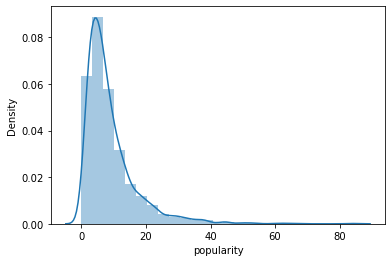

In [18]:
sns.distplot(df['popularity'], bins=25) # Shows extreme values

In [19]:
# Check the mean
df['popularity'].mean()

8.95344086930273

In [20]:
# Check the median
df['popularity'].median() 

6.5731

In [21]:
# Check the max
df['popularity'].max() 

84.6229

## 03. Data Prep for Regression Analysis 

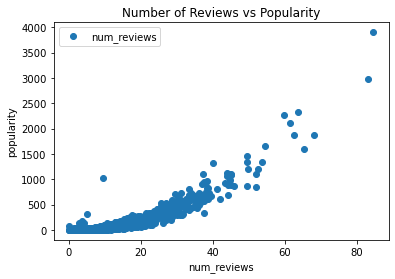

In [22]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'popularity', y='num_reviews',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Number of Reviews vs Popularity')  
plt.xlabel('num_reviews')  
plt.ylabel('popularity')  
plt.show()

Hypothesis: Trails with more reviews are more popular

In [23]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['num_reviews'].values.reshape(-1,1)
y = df['popularity'].values.reshape(-1,1)

In [24]:
X

array([[423],
       [260],
       [224],
       ...,
       [ 31],
       [  8],
       [ 45]])

In [26]:
y

array([[24.8931],
       [18.0311],
       [17.7821],
       ...,
       [ 8.5066],
       [ 8.324 ],
       [ 2.4176]])

In [27]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 04. Regression analysis

In [29]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [30]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [31]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

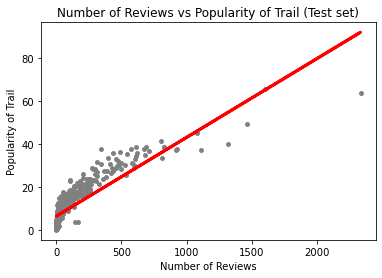

In [32]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Number of Reviews vs Popularity of Trail (Test set)')
plot_test.xlabel('Number of Reviews')
plot_test.ylabel('Popularity of Trail')
plot_test.show()

In [33]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [34]:
# Print the model summary statistics. Evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.03668837]]
Mean squared error:  15.493900989723755
R2 score:  0.75652279258684


In [35]:
y_predicted

array([[ 6.63212006],
       [ 6.41198981],
       [31.50683761],
       [ 7.8428364 ],
       [ 7.14575729],
       [ 6.63212006],
       [ 6.41198981],
       [ 6.41198981],
       [ 6.44867819],
       [23.0685116 ],
       [ 6.74218518],
       [ 6.59543168],
       [14.63018558],
       [ 6.7054968 ],
       [ 6.52205493],
       [ 6.48536656],
       [ 6.59543168],
       [10.04413884],
       [ 6.63212006],
       [ 6.8522503 ],
       [ 6.66880843],
       [ 7.87952477],
       [ 8.35647363],
       [ 7.65939453],
       [ 6.59543168],
       [10.41102258],
       [ 6.41198981],
       [ 6.88893867],
       [ 7.87952477],
       [15.18051119],
       [10.66784119],
       [ 6.41198981],
       [ 6.63212006],
       [10.30095745],
       [ 8.24640851],
       [ 6.48536656],
       [ 7.10906892],
       [ 6.44867819],
       [ 9.31037136],
       [ 6.7054968 ],
       [ 6.44867819],
       [ 7.32919916],
       [ 7.51264103],
       [ 7.47595266],
       [ 7.36588753],
       [ 7

In [36]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,4.9204,6.632120
1,3.0804,6.411990
2,38.5795,31.506838
3,7.8648,7.842836
4,5.5826,7.145757
5,3.1841,6.632120
6,1.5322,6.411990
7,2.0814,6.411990
8,2.7507,6.448678
9,28.8685,23.068512


### Compare how the regression fits the training set

In [38]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [39]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [40]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.03668837]]
Mean squared error:  18.328415154511678
R2 score:  0.7277269669740694


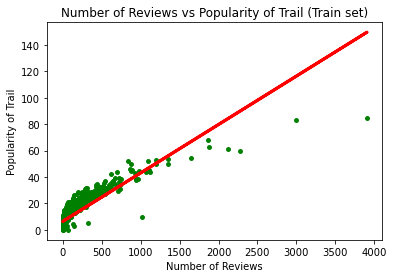

In [42]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Number of Reviews vs Popularity of Trail (Train set)')
plot_test.xlabel('Number of Reviews')
plot_test.ylabel('Popularity of Trail')
plot_test.show()

### Performance improvement after removing outliers

In [44]:
# Clean the extreme values from the "Price per Unit" variable observed during the consistency checks.

df_test = df[df['popularity'] <=40] 

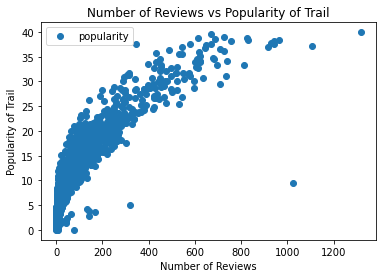

In [45]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'num_reviews', y='popularity', style='o')  
plt.title('Number of Reviews vs Popularity of Trail')  
plt.xlabel('Number of Reviews')  
plt.ylabel('Popularity of Trail')  
plt.show()

In [46]:
# Reshape again.

X_2 = df_test['num_reviews'].values.reshape(-1,1)
y_2 = df_test['popularity'].values.reshape(-1,1)

In [47]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [48]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [49]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [50]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [51]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.05305234]]
Mean squared error:  10.649552941533363
R2 score:  0.7973816505543783


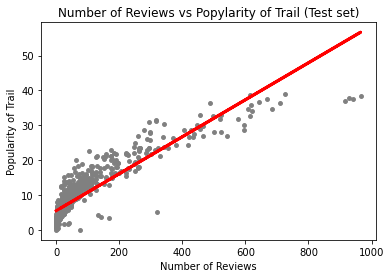

In [52]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Number of Reviews vs Popylarity of Trail (Test set)')
plot_test.xlabel('Number of Reviews')
plot_test.ylabel('Popularity of Trail')
plot_test.show()

In [53]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,5.8949,6.351653
1,7.4370,6.457757
2,8.3952,8.208484
3,7.3937,6.457757
4,10.5687,7.837118
5,6.6276,6.457757
6,9.7015,8.367641
7,7.3761,7.412699
8,10.6258,7.412699
9,5.1985,6.723019


It appears the model performed better after excluding outliers. 